In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, pearsonr

# ----------------------------
# 1. 데이터 불러오기
# ----------------------------

df = pd.read_csv("data/oversampling_labeled.csv")

# ----------------------------
# 2. 변수 스케일링
# ----------------------------

features = [
    "traffic",
    "fence",
    "eco",
    "water",
    "agri",
    "avg_temp_springautumn",
    "avg_temp_summer",
    "month_total_rain_summer",
    "max_snow_winter",
    "avg_low_temp_winter",
]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled, columns=features)

# ----------------------------
# 3. A, B, C, D 계산
# ----------------------------

A = scaled_df[["traffic"]].max(axis=1)
B = scaled_df[["max_snow_winter"]].mean(axis=1)
C = scaled_df[["avg_temp_summer", "month_total_rain_summer"]].min(axis=1)
D = scaled_df[["fence"]].mean(axis=1)


risk_index = (A * 1 + B * 1.28 + C * 1.46 + D * 1.78) / (1 + 1.28 + 1.78 + 1.46)

df["risk_index"] = risk_index

# ----------------------------
# 5. Binary target 생성
# ----------------------------

df["count_binary"] = df["risk_grade_3"].apply(lambda x: 1 if x in [1, 2] else 0)

# ----------------------------
# 6. 출력
# ----------------------------

# 첫 5행 출력
print(df[["risk_index", "count", "count_binary"]].head())

# 상관계수 계산
spearman_corr, p_s = spearmanr(df["risk_index"], df["count_binary"])
pearson_corr, p_p = pearsonr(df["risk_index"], df["count_binary"])

# 출력 포맷 추가
print(
    f"risk_index_final_v5과 count_binary 사이의 상관계수(Spearman): {spearman_corr:.3f}"
)
print(
    f"risk_index_final_v5과 count_binary 사이의 상관계수(Pearson): {pearson_corr:.3f}"
)

   risk_index  count  count_binary
0    0.435030      0             0
1    0.435030      0             0
2    0.435030      0             0
3    0.435030      0             0
4    0.484273      0             0
risk_index_final_v5과 count_binary 사이의 상관계수(Spearman): 0.315
risk_index_final_v5과 count_binary 사이의 상관계수(Pearson): 0.357


   risk_index  count  count_binary
0    0.209181      0             0
1    0.209181      0             0
2    0.209181      0             0
3    0.209181      0             0
4    0.191483      0             0
risk_index_final_v5과 count_binary 사이의 상관계수(Spearman): 0.444
risk_index_final_v5과 count_binary 사이의 상관계수(Pearson): 0.489


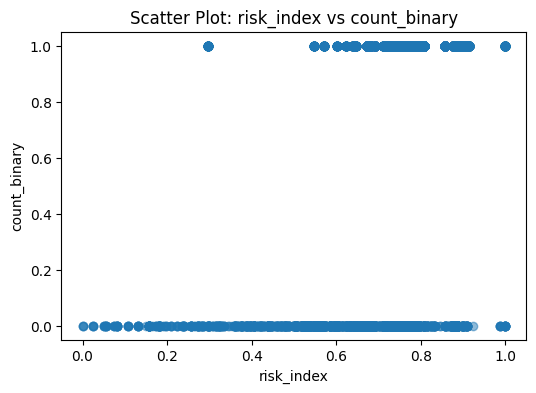


✅ 변수별 상관계수:
                          feature  correlation  abs_corr
16                avg_wind_winter    -0.357508  0.357508
8                 avg_temp_winter    -0.287221  0.287221
4                           water    -0.243212  0.243212
10  month_total_rain_springautumn    -0.237042  0.237042
15          avg_wind_springautumn    -0.219494  0.219494
2                           fence     0.213989  0.213989
0                         traffic     0.193338  0.193338
12                max_snow_winter     0.176160  0.176160
13            avg_low_temp_winter    -0.169122  0.169122
1                       1km_inner    -0.127803  0.127803
7                 avg_temp_summer     0.099692  0.099692
3                             eco    -0.096171  0.096171
14                avg_wind_summer    -0.088520  0.088520
11        month_total_rain_winter    -0.085525  0.085525
5                            agri     0.054770  0.054770
9         month_total_rain_summer     0.048937  0.048937
6           avg_te

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

# ----------------------------
# 1. 데이터 불러오기
# ----------------------------

df = pd.read_csv("data/oversampling_labeled.csv")

# ----------------------------
# 2. 변수 스케일링
# ----------------------------

features = [
    "traffic",
    "1km_inner",
    "fence",
    "eco",
    "water",
    "agri",
    "avg_temp_springautumn",
    "avg_temp_summer",
    "avg_temp_winter",
    "month_total_rain_summer",
    "month_total_rain_springautumn",
    "month_total_rain_winter",
    "max_snow_winter",
    "avg_low_temp_winter",
    "avg_wind_summer",
    "avg_wind_springautumn",
    "avg_wind_winter",
]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled, columns=features)

# ----------------------------
# 3. count_binary 생성
# ----------------------------

df["count_binary"] = df["risk_grade_3"].apply(lambda x: 1 if x in [1, 2] else 0)

# ----------------------------
# 4. 변수별 상관계수 계산
# ----------------------------

correlations = []
for col in scaled_df.columns:
    corr, _ = pearsonr(scaled_df[col], df["count_binary"])
    correlations.append((col, corr))

corr_df = pd.DataFrame(correlations, columns=["feature", "correlation"])
corr_df["abs_corr"] = corr_df["correlation"].abs()

# ----------------------------
# 5. risk_index 계산
# ----------------------------

risk_index = np.zeros(len(df))

for col, corr in correlations:
    weight = abs(corr)

    # 음수 상관이면 반전
    if corr < 0:
        feature_val = 1 - scaled_df[col]
    else:
        feature_val = scaled_df[col]

    risk_index += feature_val * weight

# ----------------------------
# 6. risk_index 표준화
# ----------------------------

# 다시 MinMax Scaling
risk_index = (risk_index - risk_index.min()) / (risk_index.max() - risk_index.min())

df["risk_index"] = risk_index

# ----------------------------
# 7. 상관계수 출력
# ----------------------------

spearman_corr, p_s = spearmanr(df["risk_index"], df["count_binary"])
pearson_corr, p_p = pearsonr(df["risk_index"], df["count_binary"])

print(df[["risk_index", "count", "count_binary"]].head())
print(
    f"risk_index_final_v5과 count_binary 사이의 상관계수(Spearman): {spearman_corr:.3f}"
)
print(
    f"risk_index_final_v5과 count_binary 사이의 상관계수(Pearson): {pearson_corr:.3f}"
)

# ----------------------------
# 8. 산점도
# ----------------------------

plt.figure(figsize=(6, 4))
plt.scatter(df["risk_index"], df["count_binary"], alpha=0.5)
plt.xlabel("risk_index")
plt.ylabel("count_binary")
plt.title("Scatter Plot: risk_index vs count_binary")
plt.show()

# ----------------------------
# 9. 상관계수 출력 테이블
# ----------------------------

print("\n✅ 변수별 상관계수:")
print(corr_df.sort_values("abs_corr", ascending=False))

   risk_index  count  count_binary
0    0.336676      0             0
1    0.369687      0             0
2    0.356940      0             0
3    0.318967      0             0
4    0.386705      0             0
Spearman: 0.257
Pearson: 0.310


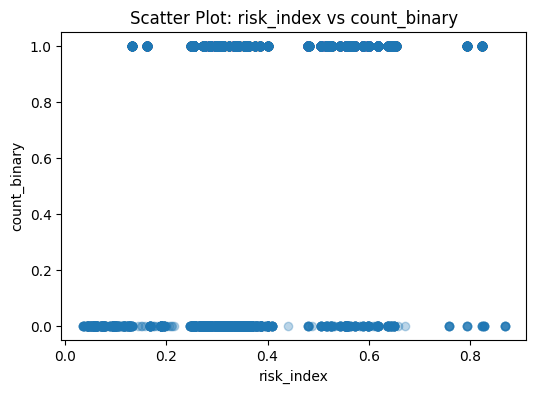

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("data/oversampling_final.csv")

# 2. Binary target 생성
if "count_binary" not in df.columns:
    df["count_binary"] = df["count"].apply(lambda x: 1 if x > 0 else 0)

# 3. 변수 선택 (1km_inner 뺌)
features = [
    "traffic",
    "fence",
    "max_snow_winter",
    "avg_temp_summer",
    "month_total_rain_summer",
]

# 4. 스케일링
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled, columns=features)

# 5. A, B, C, D 계산
A = scaled_df[["traffic"]].mean(axis=1)
B = scaled_df[["max_snow_winter"]].mean(axis=1)
C = scaled_df[["avg_temp_summer", "month_total_rain_summer"]].mean(axis=1)
D = scaled_df[["fence"]].mean(axis=1)

# 6. risk_index 계산
df["risk_index"] = (A * 2.8 + B * 2.0 + C * 1.5 + D * 1.7) / (2.8 + 2.0 + 1.5 + 1.7)

# 7. 상관계수
spearman_corr, _ = spearmanr(df["risk_index"], df["count_binary"])
pearson_corr, _ = pearsonr(df["risk_index"], df["count_binary"])

print(df[["risk_index", "count", "count_binary"]].head())
print(f"Spearman: {spearman_corr:.3f}")
print(f"Pearson: {pearson_corr:.3f}")

# 8. 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df["risk_index"], df["count_binary"], alpha=0.3)
plt.xlabel("risk_index")
plt.ylabel("count_binary")
plt.title("Scatter Plot: risk_index vs count_binary")
plt.show()

   risk_index  count  count_binary
0    0.406340      0             0
1    0.380176      0             0
2    0.429588      0             0
3    0.407704      0             0
4    0.429596      0             0
Spearman: 0.090
Pearson: 0.135


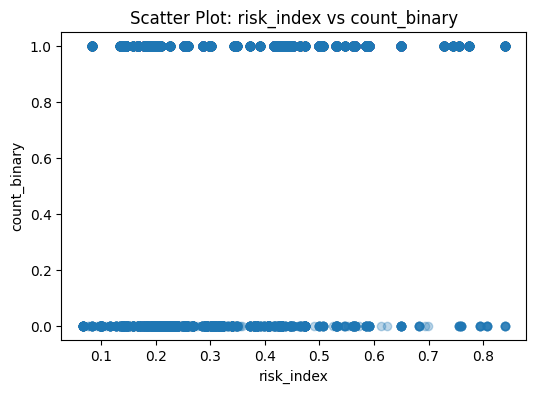

In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("data/oversampling_final.csv")

# 2. Binary target 생성
if "count_binary" not in df.columns:
    df["count_binary"] = df["count"].apply(lambda x: 1 if x > 0 else 0)

# 3. 변수 선택
features = [
    "traffic",
    "avg_temp_springautumn",
    "avg_temp_summer",
    "avg_temp_winter",
    "max_snow_winter",
]

# 4. 스케일링
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled, columns=features)

# 5. A, B, C, D, E 계산
A = scaled_df["traffic"]
B = scaled_df["avg_temp_springautumn"]
C = scaled_df["avg_temp_summer"]
D = scaled_df["avg_temp_winter"]
E = scaled_df["max_snow_winter"]

# 6. risk_index 계산
df["risk_index"] = (A * 4.5 + B * 1.8 + C * 1.6 + D * 1.4 + E * 1.2) / (
    4.5 + 1.8 + 1.6 + 1.4 + 1.2
)

# 7. 상관계수
spearman_corr, _ = spearmanr(df["risk_index"], df["count_binary"])
pearson_corr, _ = pearsonr(df["risk_index"], df["count_binary"])

print(df[["risk_index", "count", "count_binary"]].head())
print(f"Spearman: {spearman_corr:.3f}")
print(f"Pearson: {pearson_corr:.3f}")

# 8. 산점도
plt.figure(figsize=(6, 4))
plt.scatter(df["risk_index"], df["count_binary"], alpha=0.3)
plt.xlabel("risk_index")
plt.ylabel("count_binary")
plt.title("Scatter Plot: risk_index vs count_binary")
plt.show()